11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8619 - loss: 0.4742 - val_accuracy: 0.9596 - val_loss: 0.1372
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9638 - loss: 0.1208 - val_accuracy: 0.9664 - val_loss: 0.1144
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0766 - val_accuracy: 0.9704 - val_loss: 0.1003
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0570 - val_accuracy: 0.9719 - val_loss: 0.0983
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9868 - loss: 0.0424 - val_accuracy: 0.9750 - val_loss: 0.0880
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9753 - val_loss: 0.0926
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9744 - val_loss: 0.0971
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - loss: 0.0216 - 

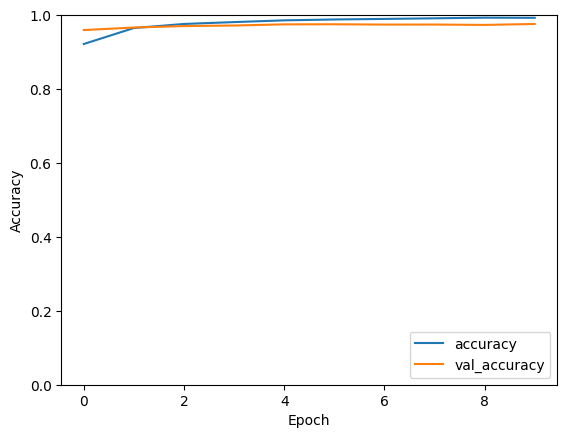

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
